In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)

# Daten importieren

In [2]:
"""
# Comparing columns of dataframes
def compare_column(df1, df2):
    df1_columns = list(df1.columns.values)
    df2_columns = list(df2.columns.values)
    for i in df1_columns:
        if i in(df2_columns):
            pass
        else: print("i is not included in ",df2)
"""

'\n# Comparing columns of dataframes\ndef compare_column(df1, df2):\n    df1_columns = list(df1.columns.values)\n    df2_columns = list(df2.columns.values)\n    for i in df1_columns:\n        if i in(df2_columns):\n            pass\n        else: print("i is not included in ",df2)\n'

In [3]:
# Import Data
data_path = "./"
asteroids = pd.read_csv(data_path + "Asteroid_Updated.csv")

C:\Users\Blaschko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
asteroids.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [5]:
asteroids.shape

(839714, 31)

In [6]:
# asteroids.isna().sum()

# Daten bereinigen

**Vorverarbeitung**

1. Alle Zeilen ohne Zielvariable (Diameter) entfernt
2. Alle features rausgenomen die mehr als 90% fehlende Werte haben
3. Diameter zu float und condition_code zu int umgewandelt
4. Dropped "name" weil der Name einzigartig ist
5. Umkodieren von kategorischen Werten (neo und pha) von Y/N zu 1/0
6. Alle NANs mit Durchschnitt gefüllt
7. Transformation der Zielvariable Diameter in diameter_log
8. Endkontrolle nach missing values o.ä.

In [7]:
# Drop all rows without diameter
df_dropna = asteroids[asteroids["diameter"].notna()]

In [8]:
df_dropna.shape

(137636, 31)

In [9]:
df_dropna.isna().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [10]:
# Drop all colums with less than 90 % NA
df_test = df_dropna[df_dropna.columns[df_dropna.isnull().mean() < 0.9]]
# data_updated_dropna=data_updated_dropna.dropna(axis = "columns", thresh = 0.9 * len(data_updated_dropna))

In [11]:
df_test.shape

(137636, 22)

In [12]:
df_test.isna().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
albedo              1230
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [13]:
df_test.describe(include="all")

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
count,15124,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137498.000000,137636.0,137636.000000,136889.000000,137636,137636,137636.000,136406.000000,137636.000000,137636,137636.000000,1.376360e+05,137636.000000
unique,15124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,2,2,24462.000,NaN,NaN,11,NaN,NaN,NaN
top,Makotoirie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,N,N,3.296,NaN,NaN,MBA,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126194.0,NaN,NaN,136786,137415,44.000,NaN,NaN,126390,NaN,NaN,NaN
mean,NaN,2.814613,0.145485,10.349182,169.827629,181.904551,2.402609,3.226618,4.884248,8969.818601,NaN,675.027740,15.177041,NaN,NaN,NaN,0.130066,1.420145,NaN,0.219640,1.783972e+03,183.116785
std,NaN,1.522740,0.077573,6.835111,102.713052,103.556464,0.516169,2.896374,25.532565,6165.176190,NaN,595.935104,1.407654,NaN,NaN,NaN,0.109994,0.512241,NaN,0.056980,9.325769e+03,103.411497
min,NaN,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,NaN,5.000000,3.200000,NaN,NaN,NaN,0.001000,0.000166,NaN,0.000128,1.810067e+02,0.000517
25%,NaN,2.536714,0.089623,5.120506,82.334880,91.947943,2.068948,2.864438,4.040317,6291.000000,NaN,215.000000,14.400000,NaN,NaN,NaN,0.053000,1.082523,NaN,0.181231,1.475726e+03,94.301261
50%,NaN,2.750859,0.138543,9.389963,160.438430,183.669900,2.363897,3.167516,4.562581,7572.000000,NaN,496.000000,15.300000,NaN,NaN,NaN,0.078000,1.384935,NaN,0.216024,1.666483e+03,186.826667
75%,NaN,3.092537,0.191141,13.738588,256.268387,271.762261,2.685811,3.468608,5.438518,9731.000000,NaN,984.000000,16.100000,NaN,NaN,NaN,0.188000,1.699385,NaN,0.243948,1.986419e+03,271.468299


In [14]:
# Change diameter type into floa
df_test.loc[:, "diameter"] = df_test.loc[:, "diameter"].astype(float)

C:\Users\Blaschko\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [15]:
df_test["condition_code"].unique()

array([0, 1, 3, 2, '0', '1', '2', '3', '4', '5', '9', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [16]:
# transform condition code (int, str, float) in integer
df_test.loc[:, "condition_code"] = df_test.loc[:, "condition_code"].astype(int)

In [17]:
df_test["neo"].unique()

array(['N', 'Y'], dtype=object)

In [18]:
df_test["pha"].unique()

array(['N', 'Y'], dtype=object)

In [19]:
df_test["class"].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

In [20]:
# Drop "name" weil einzigartig für alle und condition_code 
# (uncertainty parameter of the orbit)
df = df_test.drop(['name'],axis=1)

# Drop neo und pha weil "Y" und "N"
# df = df.drop(['neo','pha'],axis=1)

In [21]:
neo_code = {'Y': 1,'N': 0} 
pha_code = {'Y': 1,'N': 0} 

df.neo = [neo_code[item] for item in df.neo] 
df.pha = [pha_code[item] for item in df.pha] 

In [22]:
# Alle NANs mit Durchschnitt füllen
df = df.fillna(df.mean())

In [23]:
df["diameter_log"]=np.log(df["diameter"])

In [24]:
df.describe(include="all")

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma,diameter_log
count,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636,137636.000000,1.376360e+05,137636.000000,137636.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126390,NaN,NaN,NaN,NaN
mean,2.814613,0.145485,10.349182,169.827629,181.904551,2.402609,3.226618,4.884248,8969.818601,0.485207,675.027740,15.177041,0.006176,0.001606,5.483228,0.130066,1.420145,NaN,0.219640,1.783972e+03,183.116785,1.421174
std,1.522740,0.077573,6.835111,102.713052,103.556464,0.516169,2.896374,25.532565,6162.084652,1.966078,595.935104,1.403829,0.078343,0.040039,9.385735,0.109501,0.512241,NaN,0.056980,9.325769e+03,103.411497,0.641415
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,0.000000,5.000000,3.200000,0.000000,0.000000,0.002500,0.001000,0.000166,NaN,0.000128,1.810067e+02,0.000517,-5.991465
25%,2.536714,0.089623,5.120506,82.334880,91.947943,2.068948,2.864438,4.040317,6292.000000,0.000000,215.000000,14.400000,0.000000,0.000000,2.770000,0.053000,1.082523,NaN,0.181231,1.475726e+03,94.301261,1.018847
50%,2.750859,0.138543,9.389963,160.438430,183.669900,2.363897,3.167516,4.562581,7577.000000,0.000000,496.000000,15.300000,0.000000,0.000000,3.956000,0.079000,1.384935,NaN,0.216024,1.666483e+03,186.826667,1.375233
75%,3.092537,0.191141,13.738588,256.268387,271.762261,2.685811,3.468608,5.438518,9726.000000,0.000000,984.000000,16.100000,0.000000,0.000000,5.742000,0.187000,1.699385,NaN,0.243948,1.986419e+03,271.468299,1.747808


In [25]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma,diameter_log
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,0,0,939.400,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096,6.845241
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,0,0,545.000,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133,6.300786
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,0,0,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016,5.507751
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,0,0,525.400,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936,6.264160
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,0,0,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289,4.670012


# EDA

C:\Users\Blaschko\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


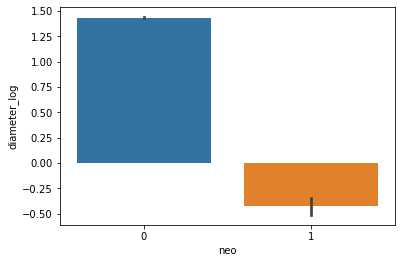

In [26]:
sns.barplot("neo","diameter_log",data =df);

C:\Users\Blaschko\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


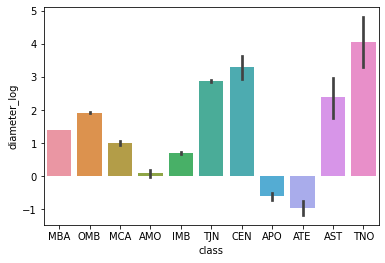

In [27]:
# Nehmen wir nicht weil es sich aus a, q und e zusammensetzt
sns.barplot("class","diameter_log",data =df);

C:\Users\Blaschko\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


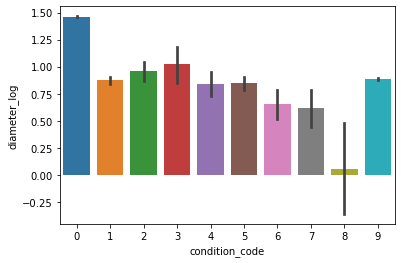

In [28]:
sns.barplot("condition_code","diameter_log",data =df);

C:\Users\Blaschko\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diameter_log', ylabel='Density'>

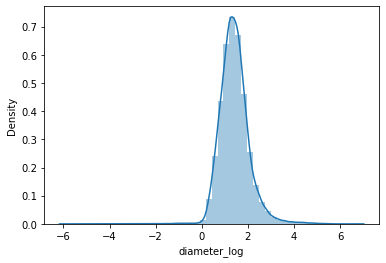

In [29]:
sns.distplot(df["diameter_log"])

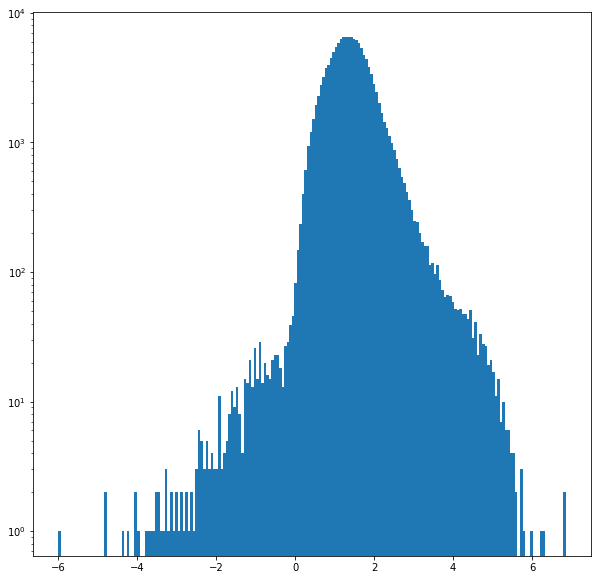

In [30]:
plt.figure(figsize=(10,10))
plt.hist(df["diameter_log"], bins=200)
#plt.xscale(value="log")
plt.yscale(value="log");

In [31]:
# sns.pairplot(df.iloc[:,:6], palette = 'coolwarm');

In [32]:
df_num = df.select_dtypes(exclude='object')

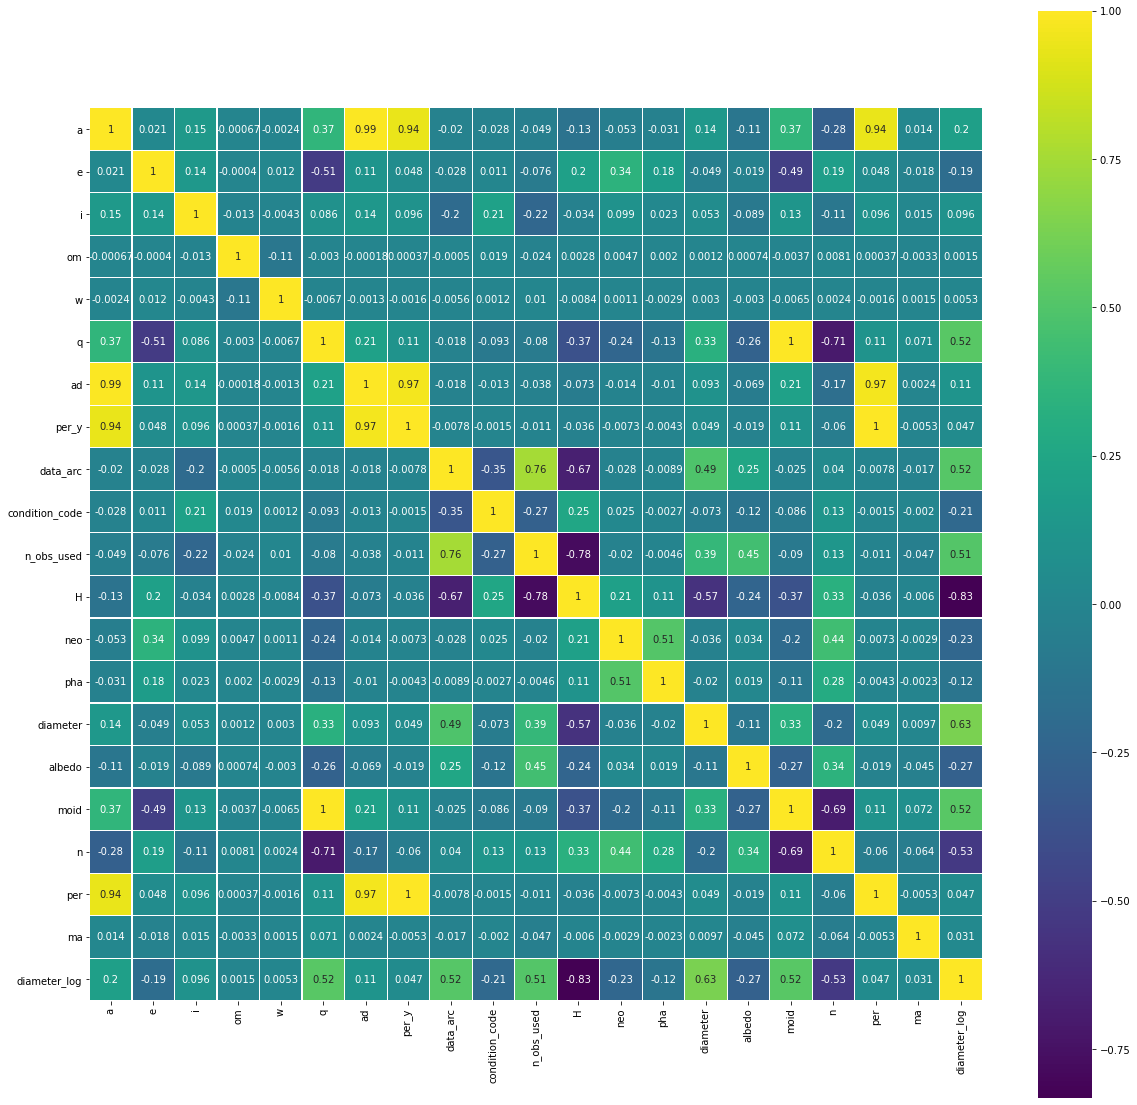

In [33]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
sns.heatmap(df_num.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True);

# Machine Learning

## Lineare Regression nur mit H

In [100]:
Y = df["diameter_log"]
# X = df.drop(["diameter_log", "diameter"], axis=1)
X1 = df["H"].values.reshape(-1, 1)

In [101]:
""" Lineare Regression nur mit H"""
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2) # , stratify=Y

# Initiate and fit model
model_1 = lr()
model_1.fit(X_train, y_train)

# print scores:
print("Lineare Regression nur mit H:")
print("")
print("Test score: ", model_1.score(X_test, y_test))
print("Train score: ", model_1.score(X_train, y_train))

Lineare Regression nur mit H:

Test score:  0.6964943243636285
Train score:  0.6919211304803008


In [102]:
cross_val_lr = np.mean(cross_val_score(lr(), X1, Y))
cross_val_lr

0.5500033688757353

In [103]:
""" Quadratic and absolute error"""
y_pred_lr = model_1.predict(X_test)

quadratic_error = np.mean((y_test - y_pred_lr)**2)
absolute_error = np.mean(np.abs(y_test - y_pred_lr))

print("Absolute Error: ", absolute_error)
print("Quadratic Error: ", quadratic_error)

Absolute Error:  0.30361192696881706
Quadratic Error:  0.12636772479455102


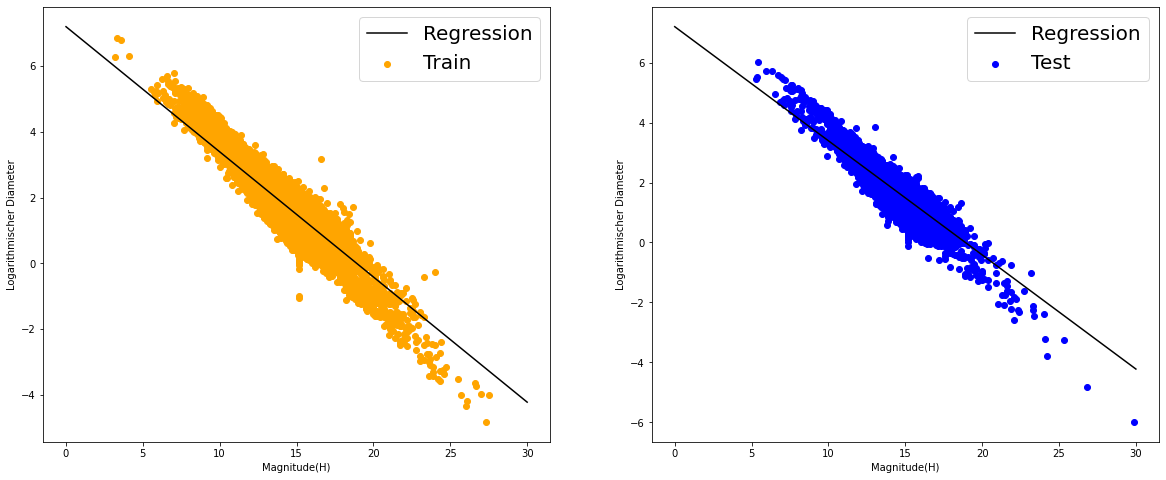

In [37]:
xx = np.linspace(0, 30, 100)
yp_x = model_1.predict(xx.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].scatter(X_train, y_train, c='orange', label="Train")
axes[0].plot(xx, yp_x, c='black', label="Regression")
axes[0].set_xlabel("Magnitude(H)")
axes[0].set_ylabel("Logarithmischer Diameter")
axes[0].legend(prop={'size': 20})

axes[1].scatter(X_test, y_test, c= "blue", label="Test")
axes[1].plot(xx, yp_x, c='black', label="Regression")
axes[1].set_xlabel("Magnitude(H)")
axes[1].set_ylabel("Logarithmischer Diameter")
axes[1].legend(prop={'size': 20});

## Multivariate Regression mit 2 Merkmalen

In [104]:
Y = df["diameter_log"]
X_trial = df[["H", "n"]].values

In [105]:
""" Lineare Regression mit "H" und "n" """
X_train, X_test, y_train, y_test = train_test_split(X_trial, Y, test_size = 0.2)

# Initiate and fit model
model_trial = lr()
model_trial.fit(X_train, y_train)

# print scores:
print("Lineare Regression mit H und n:")
print("")
print("Test score: ", model_trial.score(X_test, y_test))
print("Train score: ", model_trial.score(X_train, y_train))

Lineare Regression mit H und n:

Test score:  0.7594638322951681
Train score:  0.7649703833817163


In [106]:
""" Quadratic and absolute error"""
y_pred_trial = model_trial.predict(X_test)

quadratic_error = np.mean((y_test - y_pred_trial)**2)
absolute_error = np.mean(np.abs(y_test - y_pred_trial))

print("Absolute Error: ", absolute_error)
print("Quadratic Error: ", quadratic_error)

Absolute Error:  0.2559464474163306
Quadratic Error:  0.09634132765190707


**Versuch (1) 3D Plot**
x_axis = X_trial[0]
y_axis = X_trial[1]
z_axis = Y

x_predictor = np.linspace(0, 3, 100)
y_predictor = np.linspace(0, 4, 100)

xx_pred, yy_pred = np.meshgrid(x_predictor, y_predictor)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

##### Make predictions
predicted_model_trial = model_trial.predict(model_viz)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
#ax.scatter(xx_pred.flatten(), yy_pred.flatten(), 
          # predicted_model_trial, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.plot(x_axis, y_axis, z_axis)
#ax.contour3D(X, Y, Z, 50, cmap="binary")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

**Versuch (2) 3D Plot**

xx_2 = np.linspace(0, 30, 100)
xx2_2 = np.linspace(0, 30, 100)

yp_2_x = model_trial.predict(xx.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#axes[0].scatter(X_train, y_train, c='orange', label="Train")
axes[0].plot(xx_2, yp_2_x, c='black', label="Regression")
#axes[0].set_xlabel("Magnitude(H)")
axes[0].set_ylabel("Logarithmischer Diameter")
axes[0].legend(prop={'size': 20})

"""axes[1].scatter(X_test, y_test, c= "blue", label="Test")
axes[1].plot(xx, yp_x, c='black', label="Regression")
axes[1].set_xlabel("Magnitude(H)")
axes[1].set_ylabel("Logarithmischer Diameter")
axes[1].legend(prop={'size': 20});"""

## Multivariate Regression mit 6 Merkmalen

In [107]:
Y = df["diameter_log"]
X2 = df[["H", "q", "data_arc", "n_obs_used", "moid", "n"]].values

In [108]:
""" Lineare Regression mit "H", "q", "data_arc", "n_obs_used", "moid" und "n" """
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.2)

# Initiate and fit model
model_2 = lr()
model_2.fit(X_train, y_train)

# print scores:
print("Lineare Regression mit H, q, data_arc, n_obs_used, moid und n:")
print("")
print("Test score: ", model_2.score(X_test, y_test))
print("Train score: ", model_2.score(X_train, y_train))

Lineare Regression mit H, q, data_arc, n_obs_used, moid und n:

Test score:  0.7808860066974458
Train score:  0.7811259223317003


In [109]:
cross_val_mlr = np.mean(cross_val_score(lr(), X2, Y))
cross_val_mlr

0.662127468719261

In [110]:
""" Quadratic and absolute error"""
y_pred_6 = model_2.predict(X_test)

quadratic_error = np.mean((y_test - y_pred_6)**2)
absolute_error = np.mean(np.abs(y_test - y_pred_6))

print("Absolute Error: ", absolute_error)
print("Quadratic Error: ", quadratic_error)

Absolute Error:  0.24561411625245624
Quadratic Error:  0.08978888105066725


## Polynomiale Regression mit
"H", "q", "data_arc", "n_obs_used", "moid" und degree=2

In [111]:
Y = df["diameter_log"]
X_klein = df[["H", "q", "data_arc", "n_obs_used", "moid"]].values

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_klein, Y, test_size = 0.2)

# Mit Pipeline
pf_1 = make_pipeline(PolynomialFeatures(degree=2),lr())
pf_1.fit(X_train,y_train)
"""
# Ohne Pipeline
pf_1 = PolynomialFeatures(degree = 2)

# 1. Schritt - Daten transformieren/expandieren
pf.fit(X_train)
X_train_transformed = pf.transform(X_train)
X_test_transformed = pf.transform(X_test)

# 2. Schritt - Lineares Modell fitten
model = lr()
model.fit(X_train_transformed, y_train)
"""

# 3.Schritt Validierung
# print scores:
print("Polynomiale Regression mit ohne 'n' und degree 2:")
print("")
print("Test score: ", pf_1.score(X_test, y_test))
print("Train score: ", pf_1.score(X_train, y_train))

Polynomiale Regression mit ohne 'n' und degree 2:

Test score:  0.7882515650123532
Train score:  0.7893018882892078


In [113]:
cross_val_plr = np.mean(cross_val_score(lr(), X_klein, Y))
cross_val_plr

0.6369191696238645

In [114]:
""" Quadratic and absolute error"""
y_pred_pf_1 = pf_1.predict(X_test)

quadratic_error = np.mean((y_test - y_pred_pf_1)**2)
absolute_error = np.mean(np.abs(y_test - y_pred_pf_1))

print("Absolute Error: ", absolute_error)
print("Quadratic Error: ", quadratic_error)

Absolute Error:  0.2413914019761394
Quadratic Error:  0.08770724957547618


## Multivariate Regression mit 10 Merkmalen

In [115]:
Y = df["diameter_log"]
X3 = df[["H","n","moid","n_obs_used","data_arc","q","a","e","neo","albedo"]].values

In [116]:
""" Lineare Regression mit "H","n","moid","n_obs_used","data_arc","q","a","e","neo" und
"albedo" """
X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size = 0.2)

# Initiate and fit model
model_2 = lr()
model_2.fit(X_train, y_train)

# print scores:
print("Lineare Regression mit 10 Merkmalen:")
print("")
print("Test score: ", model_2.score(X_test, y_test))
print("Train score: ", model_2.score(X_train, y_train))

Lineare Regression mit 10 Merkmalen:

Test score:  0.9334009373429816
Train score:  0.9341829562443019


In [117]:
cross_val_mr10 = np.mean(cross_val_score(lr(), X3, Y))
cross_val_mr10

0.9018268077609146

In [118]:
""" Quadratic and absolute error"""
y_pred_model_2 = model_2.predict(X_test)

quadratic_error = np.mean((y_test - y_pred_model_2)**2)
absolute_error = np.mean(np.abs(y_test - y_pred_model_2))

print("Absolute Error: ", absolute_error)
print("Quadratic Error: ", quadratic_error)

Absolute Error:  0.11959010715396852
Quadratic Error:  0.02709423555625618


## Multivariate Regression mit 11 Merkmalen

In [119]:
Y = df["diameter_log"]
X_11 = df[["H","n","moid","n_obs_used","data_arc","q","a","e","neo","albedo", 
           "condition_code"]].values

In [120]:
""" Lineare Regression mit "H","n","moid","n_obs_used","data_arc","q","a","e","neo" und
"albedo" """
X_train, X_test, y_train, y_test = train_test_split(X_11, Y, test_size = 0.2)

# Initiate and fit model
model_cc = lr()
model_cc.fit(X_train, y_train)

# print scores:
print("Lineare Regression mit 11 Merkmalen:")
print("")
print("Test score: ", model_cc.score(X_test, y_test))
print("Train score: ", model_cc.score(X_train, y_train))

Lineare Regression mit 11 Merkmalen:

Test score:  0.9344334100235994
Train score:  0.9349063002292624


In [121]:
cross_val_cc = np.mean(cross_val_score(lr(), X_11, Y, cv=10))
cross_val_cc

0.9007218329269593

In [122]:
""" Quadratic and absolute error"""
y_pred_cc = model_cc.predict(X_test)

quadratic_error = np.mean((y_test - y_pred_cc)**2)
absolute_error = np.mean(np.abs(y_test - y_pred_cc))

print("Absolute Error: ", absolute_error)
print("Quadratic Error: ", quadratic_error)

Absolute Error:  0.11942472658740919
Quadratic Error:  0.027345232494341162


## Polynomiale Regression mit 6 Merkmalen

In [123]:
""" Polynomiale Regression nur mit "H", "q", "data_arc", "n_obs_used", "moid" und "n" 
degree 2
"""
X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size = 0.2)

# Mit Pipeline
pf_2 = make_pipeline(PolynomialFeatures(degree=2),lr())
pf_2.fit(X_train,y_train)

# 3.Schritt Validierung
print("Polynomiale Regression mit 6 Merkmalen und degree 2:")
print("")
print("Test score: ", pf_2.score(X_test, y_test))
print("Train score: ", pf_2.score(X_train, y_train))

Polynomiale Regression mit 6 Merkmalen und degree 2:

Test score:  0.9580297771346628
Train score:  0.9584527560703788


In [124]:
cross_val_pf6_cv5 = np.mean(cross_val_score(pf_2, X3, Y,cv=5))
cross_val_pf6_cv5

0.31268718990869687

In [125]:
cross_val_pf6_cv10 = np.mean(cross_val_score(pf_2, X3, Y,cv=10))
cross_val_pf6_cv10

0.9058098897488236

In [126]:
""" Quadratic and absolute error"""
y_pred_poly_6 = pf_2.predict(X_test)

quadratic_error = np.mean((y_test - y_pred_poly_6)**2)
absolute_error = np.mean(np.abs(y_test - y_pred_poly_6))

print("Absolute Error: ", absolute_error)
print("Quadratic Error: ", quadratic_error)

Absolute Error:  0.09178832234915625
Quadratic Error:  0.017188116113501826


### Beispiel von Overfitting:

In [52]:
""" Polynomiale Regression nur mit "H", "q", "data_arc", "n_obs_used", "moid" und "n" 
degree = 3
"""
X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size = 0.2)

# Mit Pipeline
pf_3 = make_pipeline(PolynomialFeatures(degree=3),lr())
pf_3.fit(X_train,y_train)

# Validierung
print("Polynomiale Regression mit 6 Merkmalen und degree 3:")
print("")
print("Test score: ", pf_3.score(X_test, y_test))
print("Train score: ", pf_3.score(X_train, y_train))

Polynomiale Regression mit 6 Merkmalen und degree 3:

Test score:  -59.432131651062136
Train score:  0.9512638405398064


In [53]:
cross_val_pf6_d3 = np.mean(cross_val_score(pf_3,X2, Y,cv=5))
cross_val_pf6_d3

0.572263040115409

## Polynomiale Regression mit 10 Merkmalen

In [95]:
Y = df["diameter_log"]
X4 = df[["H","n","moid","n_obs_used","data_arc","q","a","e","neo","albedo"]].values

In [96]:
""" Polynomiale Regression mit "H","n","moid","n_obs_used","data_arc","q","a","e",
"neo" und "albedo" 
degree = 2
"""
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size = 0.2)

# Mit Pipeline
quadratic_regression = make_pipeline(PolynomialFeatures(degree=2),lr())
quadratic_regression.fit(X_train,y_train)

# Validierung
print("Polynomiale Regression mit 10 Merkmalen und degree 2:")
print("")
print("Test score: ", quadratic_regression.score(X_test, y_test))
print("Train score: ", quadratic_regression.score(X_train, y_train))

Polynomiale Regression mit 10 Merkmalen und degree 2:

Test score:  0.9563379056529084
Train score:  0.9586863730944298


In [97]:
cross_val_pf10 = np.mean(cross_val_score(quadratic_regression, X4, Y,cv=10))
cross_val_pf10

0.9058098897488236

In [99]:
y_pred_poly = quadratic_regression.predict(X_test)

quadratic_error = np.mean((y_test - y_pred_poly)**2)
absolute_error = np.mean(np.abs(y_test - y_pred_poly))

print("Absolute Error: ", absolute_error)
print("Quadratic Error: ", quadratic_error)

Absolute Error:  0.09209838479784031
Quadratic Error:  0.017894367433403998


##  Decision Tree

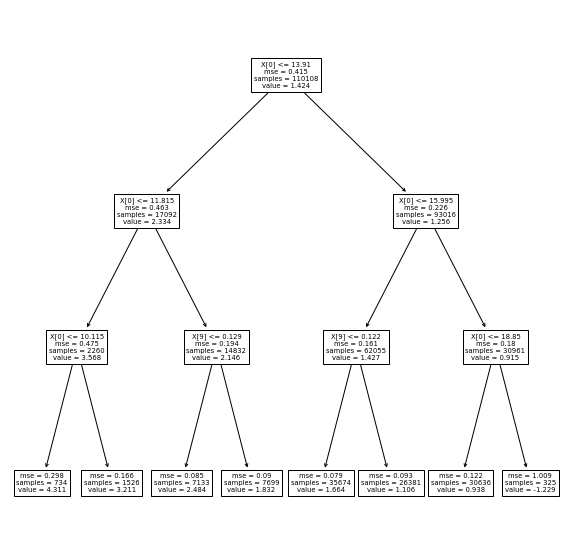

In [57]:
from sklearn.tree import plot_tree
# initiating tree
tree = DecisionTreeRegressor(max_depth=3)

# fitting tree
tree.fit(X_train, y_train)

# Decision Tree plotten
plt.figure(figsize=(10,10))
plot_tree(tree);

In [58]:
print("Decision Tree mit 10 Merkmalen und depth = 3:")
print("")
print("Test score: ", tree.score(X_test, y_test))
print("Train score: ", tree.score(X_train, y_train))

Decision Tree mit 10 Merkmalen und depth = 3:

Test score:  0.7440729163439126
Train score:  0.7563357745693005


## Decision Tree mit verschiedenen Tiefen

In [59]:
tiefe = 13
for i in range(1, tiefe + 1):
    # Trainingsfehler
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(X_train, y_train)

    # Evaluation
    train_accuracy = tree.score(X_train, y_train)
    test_accuracy = tree.score(X_test, y_test)
    print(f"Train accuracy for depth = {i}: ", round(train_accuracy * 100, 2), 
          "|| Test: ", round(test_accuracy * 100, 2))

Train accuracy for depth = 1:  36.71 || Test:  34.95
Train accuracy for depth = 2:  57.24 || Test:  55.18
Train accuracy for depth = 3:  75.63 || Test:  74.41
Train accuracy for depth = 4:  85.04 || Test:  84.35
Train accuracy for depth = 5:  90.3 || Test:  89.87
Train accuracy for depth = 6:  93.25 || Test:  92.84
Train accuracy for depth = 7:  94.87 || Test:  94.56
Train accuracy for depth = 8:  95.9 || Test:  95.56
Train accuracy for depth = 9:  96.6 || Test:  96.15
Train accuracy for depth = 10:  97.04 || Test:  96.48
Train accuracy for depth = 11:  97.39 || Test:  96.63
Train accuracy for depth = 12:  97.68 || Test:  96.63
Train accuracy for depth = 13:  97.97 || Test:  96.47


In [62]:
# zur weiteren Analyse ohne max_depth
from sklearn.tree import DecisionTreeRegressor
depths = np.arange(1,41)
train_error = []
test_error = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth = depth)
    tree.fit(X_train,y_train)
    train_error.append(tree.score(X_train, y_train))
    test_error.append(tree.score(X_test, y_test))

print(f"Bester Testfehler bei Max_depth = {test_error.index(max(test_error))+1}: Trainfehler: {train_error[test_error.index(max(test_error))]}, Testfehler: {max(test_error)}")

Bester Testfehler bei Max_depth = 11: Trainfehler: 0.9738740006129841, Testfehler: 0.9660648442342937


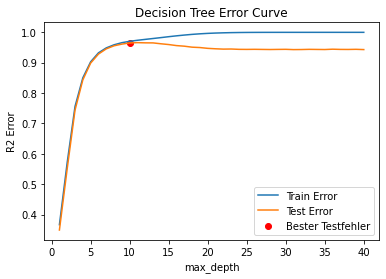

In [63]:
#Visualisierung Train-/Testfehler
plt.plot(depths,train_error, label="Train Error")
plt.plot(depths,test_error, label="Test Error")
plt.scatter(test_error.index(max(test_error)),max(test_error), c= "r", label="Bester Testfehler")
plt.ylabel("R2 Error")
plt.xlabel("max_depth")
plt.legend()

plt.title("Decision Tree Error Curve");

Tiefe 11 ist wahrscheinlich am Besten weil der Train score am höchsten ist und der Test score auch. Danach sinkt der Test score was wahrscheinlich auf Overfitting hindeutet.

## Random Forrest

In [64]:

forest = RandomForestRegressor(n_estimators=100, max_samples=0.8)
forest.fit(X_train, y_train)

print("Random Forest mit 10 Merkmalen:")
print("")
print("Test score: ", forest.score(X_test, y_test))
print("Train score: ", forest.score(X_train, y_train))

Random Forest mit 10 Merkmalen:

Test score:  0.9726200640016313
Train score:  0.9943322810388124


In [90]:
cross_val_random = np.mean(cross_val_score(forest, X2, Y,cv=10))
cross_val_random

KeyboardInterrupt: 

## Grid Search

In [65]:
# normalize= True standardisiert
def make_polynomial_regression(alpha=1.0, degree=2):
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        Ridge(alpha=alpha, normalize=True, fit_intercept=True)
    )
    return model

In [66]:
# parameter grid für GridSearchCV
# Man schreibt erst den Namen des "steps" dann den Parameter hinter den Unterstrichen
param_grid = {
    'polynomialfeatures__degree': np.arange(1, 4),
    'ridge__alpha': [10e-4, 10e-3, 10e-2, 10e-1]
}

In [67]:
""" Initiating the meta model
GridSearchCV
The model
The parameter Grid
"""
meta_model_hp_tuning = GridSearchCV(
                    make_polynomial_regression(),
                    param_grid=param_grid,
                    scoring="r2",
                    n_jobs= -1,
                    cv=10
)

In [68]:
meta_model_hp_tuning.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge', Ridge(normalize=True))]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([1, 2, 3]),
                         'ridge__alpha': [0.001, 0.01, 0.1, 1.0]},
             scoring='r2')

In [69]:
meta_model_hp_tuning.best_params_

{'polynomialfeatures__degree': 3, 'ridge__alpha': 0.01}

In [70]:
meta_model_hp_tuning.best_estimator_

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge(alpha=0.01, normalize=True))])

In [71]:
meta_model_hp_tuning.cv_results_["mean_test_score"]

array([0.93474469, 0.93404932, 0.91971717, 0.78063571, 0.95807041,
       0.95655974, 0.9465352 , 0.8801787 , 0.960039  , 0.96272122,
       0.95589755, 0.92390069])

In [72]:
meta_model_hp_tuning.cv_results_["mean_test_score"].max()

0.9627212232101389

In [73]:
""" Zum manuellen testen des "Besten" Modells (laut GridSearch) """
best_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=0.01, normalize=True, fit_intercept=True)
)
best_model.fit(X_train, y_train)

print("GridSearch mit Ridge und mit 10 Merkmalen:")
print("")
print("Test score: ", best_model.score(X_test, y_test))
print("Train score: ", best_model.score(X_train, y_train))

GridSearch mit Ridge und mit 10 Merkmalen:

Test score:  0.9556964662873364
Train score:  0.9568869501540891


### Kreuzvalidierung nach GridSearch

In [74]:
test_score1 = np.mean(cross_val_score(make_polynomial_regression(), X4, Y))

In [75]:
test_score1

0.7761159993716913

In [76]:
test_score2 = np.mean(cross_val_score(make_polynomial_regression(alpha=0.1), X4, Y))

In [77]:
test_score2

0.9029075062067994

In [78]:
all_results = cross_val_score(meta_model_hp_tuning, X4, Y, cv=10)

In [79]:
all_results

array([0.68277409, 0.95643702, 0.9524737 , 0.94746399, 0.96551019,
       0.96009989, 0.95498904, 0.9476582 , 0.85197582, 0.7965465 ])

In [80]:
""" Nested crossvalidation"""
nested_test_score = np.mean(all_results)

In [81]:
nested_test_score

0.9015928434252711